In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json  # 用于将字符串解析为字典




Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# 读取CSV文件
data = pd.read_csv("/Users/zyt/Desktop/DL_finalproject/SHResult/sh_result.csv")
print(type(data['params'][0]))


<class 'str'>


In [3]:

# 第一步：将字符串转换为字典
data['params'] = data['params'].apply(lambda x: json.loads(x.replace("'", "\"")))  # 替换单引号，并提取列表的第一个元素

# 第二步：将字典列展开为独立列
params_df = pd.json_normalize(data['params'])  # 将字典列展开为独立列
data = pd.concat([data, params_df], axis=1).drop(columns=['params'])  # 合并展开后的列

# 查看结果
print("\n解包后的数据：")
print(data)


解包后的数据：
      stage  param_index            strategy  train_loss  val_loss  \
0         1            0  successive_halving    2.280381  2.251163   
1         1            1  successive_halving    1.689616  1.582801   
2         1            2  successive_halving    2.348566  2.333454   
3         1            3  successive_halving    1.783476  1.420898   
4         1            4  successive_halving    1.974973  1.835528   
...     ...          ...                 ...         ...       ...   
2829      5           17  successive_halving    0.204262  0.275754   
2830      5           18  successive_halving    0.174406  0.302225   
2831      5           19  successive_halving    0.260100  0.320542   
2832      6            0  successive_halving    0.068900  0.316499   
2833      6            1  successive_halving    0.087599  0.287374   

      train_accuracy  val_accuracy  training_time  total_training_time  \
0          11.666667          16.2       1.925967             1.925967   
1 

In [7]:
print(data.columns)

Index(['stage', 'param_index', 'strategy', 'train_loss', 'val_loss',
       'train_accuracy', 'val_accuracy', 'training_time',
       'total_training_time', 'epochs', 'num_layers', 'units_per_layer',
       'activation', 'learning_rate', 'batch_size', 'dropout_rate',
       'l2_reg_strength'],
      dtype='object')


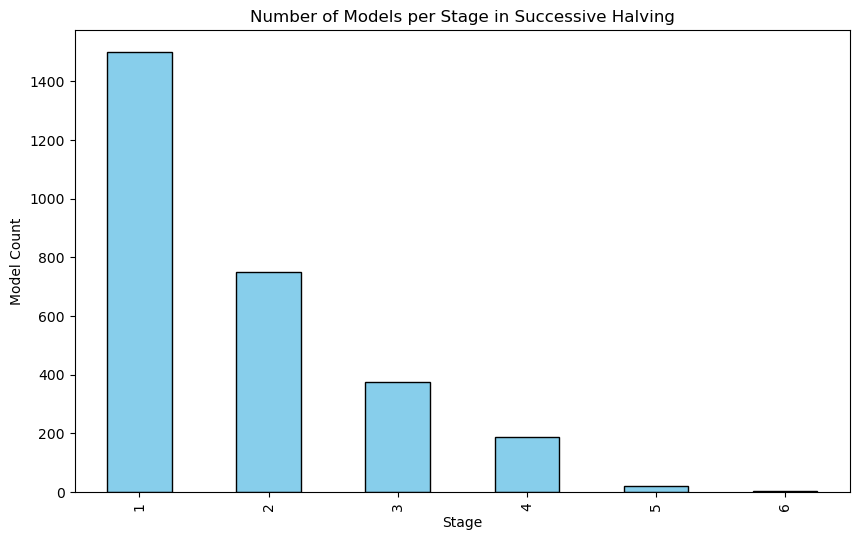

In [10]:
# 计算每个阶段的模型数量
stage_counts = data['stage'].value_counts().sort_index()

# 绘制柱状图
plt.figure(figsize=(10, 6))
stage_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Stage")
plt.ylabel("Model Count")
plt.title("Number of Models per Stage in Successive Halving")
plt.show()


/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_7220/1599744760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="stage", y="val_accuracy", palette="Set2")


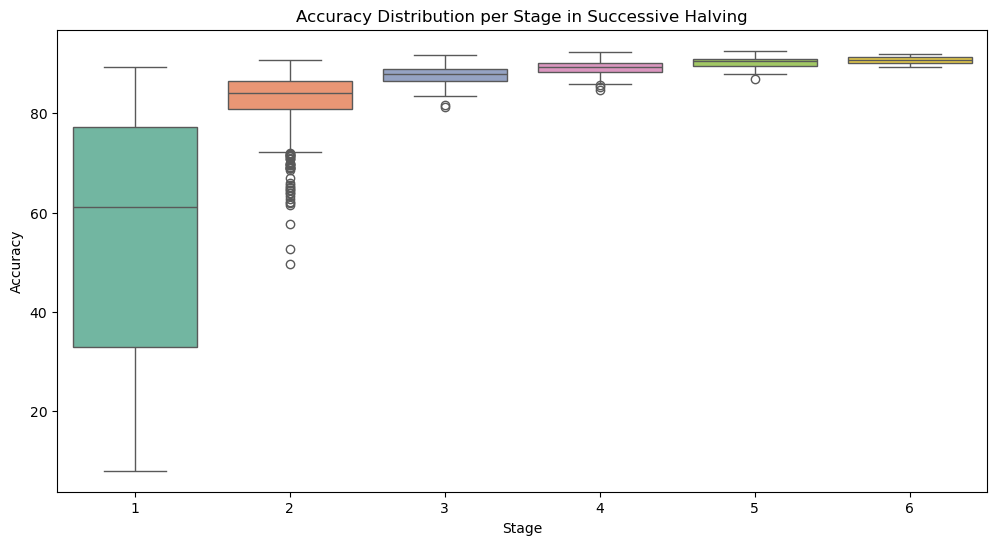

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="stage", y="val_accuracy", palette="Set2")
plt.xlabel("Stage")
plt.ylabel("Accuracy")
plt.title("Accuracy Distribution per Stage in Successive Halving")
plt.show()
